## Introduction

- This notebook is aimed at demonstrating how to use a pre-trained transformer-based model to perform sentiment analysis on text data. Specifically, we will be using the nlptown/bert-base-multilingual-uncased-sentiment model and PyTorch library to predict the sentiment score of comments about the Samsung Galaxy S23 Ultra 5G (Green, 256 GB) phone.
- We will start by importing necessary modules and defining our sentiment analysis function. Then, we will load the dataset and the model. Then apply our sentiment analysis function to create a new column of sentiment scores in the dataframe. Finally, we will use matplotlib to visualize the distribution of sentiment scores in the dataset and generate a review based on the sentiment score.

In [1]:
# List down all the packages present in the env virtual enviorment.
!pip list


Package                  Version
------------------------ ------------
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
backcall                 0.2.0
beautifulsoup4           4.12.2
bleach                   6.0.0
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       2.1.1
colorama                 0.4.6
comm                     0.1.3
contourpy                1.0.7
cycler                   0.11.0
debugpy                  1.6.7
decorator                5.1.1
defusedxml               0.7.1
executing                1.2.0
fastjsonschema           2.16.3
filelock                 3.9.0
fonttools                4.39.3
fqdn                     1.5.1
huggingface-hub          0.13.4
idna                     3.4
ipykernel                6.22.0
ipython                  8.12.0
ipython-genutils         0.2.0
ipywidgets       

## Packages Imported
- pandas: A Python library used for data manipulation and analysis.
- torch: An open source machine learning library used for creating and training neural networks.
- transformers: A Python library used for natural language processing (NLP) tasks like text classification, named entity recognition, question-answering, etc.
- matplotlib: A plotting library for the Python programming language and its numerical mathematics extension NumPy.
- numpy: for mathematical operations.
- bs4: for web scraping.

In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Pretrained BERT Model and Tokenizer

In [3]:
tokenizer=AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model=AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

D:\sentiment analysis\env\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


## Web Scrapping flipkart website for reviews on SAMSUNG Galaxy S23 Ultra 5G (Green, 256 GB) Then Creating DataFrame from Scraped Comments 


In [5]:
comments = []  # Create an empty list to store the comments
# Replace the URL with the website link you want to scrape
urls=['https://www.flipkart.com/samsung-galaxy-s23-ultra-5g-green-256-gb/product-reviews/itm77dc35f7779a4?pid=MOBGMFFX32WUYXUJ&lid=LSTMOBGMFFX32WUYXUJEUVNIW&marketplace=FLIPKART','https://www.flipkart.com/samsung-galaxy-s23-ultra-5g-green-256-gb/product-reviews/itm77dc35f7779a4?pid=MOBGMFFX32WUYXUJ&lid=LSTMOBGMFFX32WUYXUJEUVNIW&marketplace=FLIPKART&page=2','https://www.flipkart.com/samsung-galaxy-s23-ultra-5g-green-256-gb/product-reviews/itm77dc35f7779a4?pid=MOBGMFFX32WUYXUJ&lid=LSTMOBGMFFX32WUYXUJEUVNIW&marketplace=FLIPKART&page=3','https://www.flipkart.com/samsung-galaxy-s23-ultra-5g-green-256-gb/product-reviews/itm77dc35f7779a4?pid=MOBGMFFX32WUYXUJ&lid=LSTMOBGMFFX32WUYXUJEUVNIW&marketplace=FLIPKART&page=4','https://www.flipkart.com/samsung-galaxy-s23-ultra-5g-green-256-gb/product-reviews/itm77dc35f7779a4?pid=MOBGMFFX32WUYXUJ&lid=LSTMOBGMFFX32WUYXUJEUVNIW&marketplace=FLIPKART&page=5','https://www.flipkart.com/samsung-galaxy-s23-ultra-5g-green-256-gb/product-reviews/itm77dc35f7779a4?pid=MOBGMFFX32WUYXUJ&lid=LSTMOBGMFFX32WUYXUJEUVNIW&marketplace=FLIPKART&page=6']
for url in urls:
  # Send a GET request to the URL and store the response
  response = requests.get(url)
  # Create a BeautifulSoup object to parse the HTML content
  soup = BeautifulSoup(response.content, 'html.parser')
  reviews = soup.find_all("div", {"class": "t-ZTKy"})
  for review in reviews:
    comment = review.find("div", {"class": ""})
    if comment:
      comments.append(comment.text)  # Add the text of the comment to the list
# Convert comments list to a numpy array
comments_array = np.array(comments)
# Create a DataFrame from the comments array
df = pd.DataFrame(comments_array, columns=['comment'])

In [6]:
df

comment
0   Excellent product and awesome features , zoom ...
1   I ordered the product during pre-book period, ...
2   Product is really good but flipkart service is...
3   Wonderful , looks wise and specially feel like...
4   This Smartphone is just beast 👌 I am switching...
5   The first time you look at it, it isn't  that ...
6   Best Android phone available in market. Beauti...
7   Samsung S23 Ultra is the best mbl till date fr...
8   Phone is just Awsome camera quality superb S P...
9   Top class mobile none of the mobile matches to...
10  SUPER FAST PERFORMANCE I AM SO HAPPY WORKING F...
11  Product is fantastic but please guide the buye...
12        Amazing phone amazing experience 😍READ MORE
13  Just don't buy from Flipkart because first the...
14  The product is excellent, but the Flipkart web...
15  Product was good no complaints, But Absolutely...
16  Terrible experience with Flipkart. They litera...
17  Flipkart people please let us know how to avai...
18                                Fabulous 👌READ MORE
19  Excellent and best camera....display is awesom...
20  Product us fantastic. It's my first Samsung ph...
21  Overall phone is good, value for money, but st...
22  Prebooking offers of samsung watch 4 classic l...
23  This is Samsung's best phone currently. The qu...
24  Battery  6/7hours display 👌 but over priceREAD...
25  The Best from Samsung... Go for it... U won't ...
26  Moved from iPhone 14 pro to ultra, what a disp...
27  Great product. First time using a Samsung devi...
28                                      GoodREAD MORE
29                         Best from androidREAD MORE
30   The best money can buy, just go for it.READ MORE
31                   Moon photo i took todayREAD MORE
32                                    SuperbREAD MORE
33  One of the beast in all categories..simply lov...
34                                    SuperbREAD MORE
35   Excellent. Excellent camara . ExcellentREAD MORE
36                          Pathetic batteryREAD MORE
37  Better go for apple.lot many bugs and overheat...
38  Great product, better than apple phones.READ MORE
39           Awesome...,everything ... superREAD MORE
40                      Product is fabulous.READ MORE
41  Best camera evey even DSLR can't beat 200mega ...
42  worst thing about the phone is night photograp...
43  World top quality  phone s23 love you allREAD ...
44                                 ExcellentREAD MORE
45                                Power packREAD MORE
46                     Loved it for businessREAD MORE
47  This is too good. FIRSTLY THE SECURE DELIVERY ...
48                       Better then I phoneREAD MORE
49                       Camera is very goodREAD MORE
50  Fab phone.  Great battery,  awesome display. G...
51                           Awesome productREAD MORE

## Sentiment Analysis

In [7]:
def sentiment_score(review):
  tokens=tokenizer.encode(review,return_tensors='pt')
  result=model(tokens)
  s=result.logits
  return int(torch.argmax(s))+1

df['sentiment']=df['comment'].apply(lambda x: sentiment_score(x[:512]))

In [8]:
df

comment  sentiment
0   Excellent product and awesome features , zoom ...          5
1   I ordered the product during pre-book period, ...          5
2   Product is really good but flipkart service is...          3
3   Wonderful , looks wise and specially feel like...          5
4   This Smartphone is just beast 👌 I am switching...          5
5   The first time you look at it, it isn't  that ...          5
6   Best Android phone available in market. Beauti...          5
7   Samsung S23 Ultra is the best mbl till date fr...          5
8   Phone is just Awsome camera quality superb S P...          4
9   Top class mobile none of the mobile matches to...          5
10  SUPER FAST PERFORMANCE I AM SO HAPPY WORKING F...          5
11  Product is fantastic but please guide the buye...          4
12        Amazing phone amazing experience 😍READ MORE          5
13  Just don't buy from Flipkart because first the...          1
14  The product is excellent, but the Flipkart web...          2
15  Product was good no complaints, But Absolutely...          1
16  Terrible experience with Flipkart. They litera...          1
17  Flipkart people please let us know how to avai...          3
18                                Fabulous 👌READ MORE          5
19  Excellent and best camera....display is awesom...          5
20  Product us fantastic. It's my first Samsung ph...          5
21  Overall phone is good, value for money, but st...          3
22  Prebooking offers of samsung watch 4 classic l...          1
23  This is Samsung's best phone currently. The qu...          5
24  Battery  6/7hours display 👌 but over priceREAD...          3
25  The Best from Samsung... Go for it... U won't ...          5
26  Moved from iPhone 14 pro to ultra, what a disp...          5
27  Great product. First time using a Samsung devi...          5
28                                      GoodREAD MORE          5
29                         Best from androidREAD MORE          5
30   The best money can buy, just go for it.READ MORE          5
31                   Moon photo i took todayREAD MORE          4
32                                    SuperbREAD MORE          5
33  One of the beast in all categories..simply lov...          5
34                                    SuperbREAD MORE          5
35   Excellent. Excellent camara . ExcellentREAD MORE          5
36                          Pathetic batteryREAD MORE          1
37  Better go for apple.lot many bugs and overheat...          2
38  Great product, better than apple phones.READ MORE          5
39           Awesome...,everything ... superREAD MORE          5
40                      Product is fabulous.READ MORE          5
41  Best camera evey even DSLR can't beat 200mega ...          5
42  worst thing about the phone is night photograp...          2
43  World top quality  phone s23 love you allREAD ...          5
44                                 ExcellentREAD MORE          5
45                                Power packREAD MORE          5
46                     Loved it for businessREAD MORE          5
47  This is too good. FIRSTLY THE SECURE DELIVERY ...          2
48                       Better then I phoneREAD MORE          3
49                       Camera is very goodREAD MORE          5
50  Fab phone.  Great battery,  awesome display. G...          5
51                           Awesome productREAD MORE          5

## Visualization of Sentiment Score Distribution

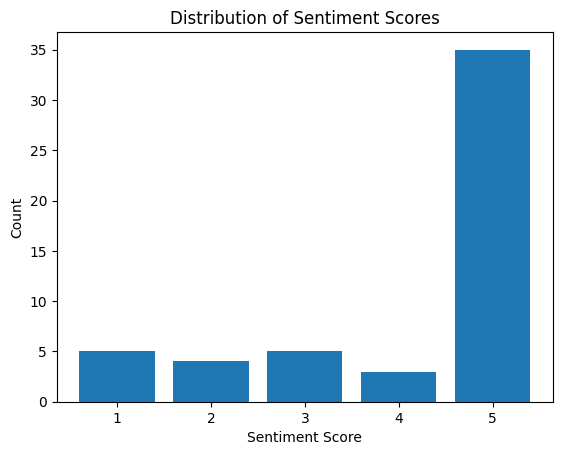

In [12]:
# Get counts of each sentiment score in the dataframe
counts = df['sentiment'].value_counts()

# Create bar graph
plt.bar(counts.index, counts.values)

# Set axis labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')
plt.savefig('disttribution.png')
# Show the plot
plt.show()

## Analysis:
- The SAMSUNG Galaxy S23 Ultra 5G (Green, 256 GB) phone is an excellent product with awesome features. The phone is just a beast with its superb camera quality and Super Fast Performance. The display is simply stunning and it's the best money can buy. The phone is the best Android phone available in the market, and its beauty is unmatched. The battery life is good, but it could have been better. Overall, this is Samsung's best phone currently and one of the beasts in all categories. If you're looking for a phone that is top class, then this is the one to go for.